In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import mlgrad.pca as pca
import pandas as pd
import sklearn.datasets as datasets
import sklearn.decomposition as decomposition

In [2]:
df = pd.read_csv("data/HIP_star.csv", sep=',', usecols=['Vmag','B-V'])
df.dropna(inplace=True)
df

,Vmag,B-V
0,9.27,0.999
1,8.65,0.778
2,10.78,1.150
3,10.57,1.030
4,9.93,1.068
...,...,...
2714,8.38,0.651
2715,8.28,0.734
2716,8.16,0.652
2717,7.72,0.563


In [3]:
B_V = df['B-V'].values
Vmag = df['Vmag'].values
X0 = np.c_[Vmag, B_V]

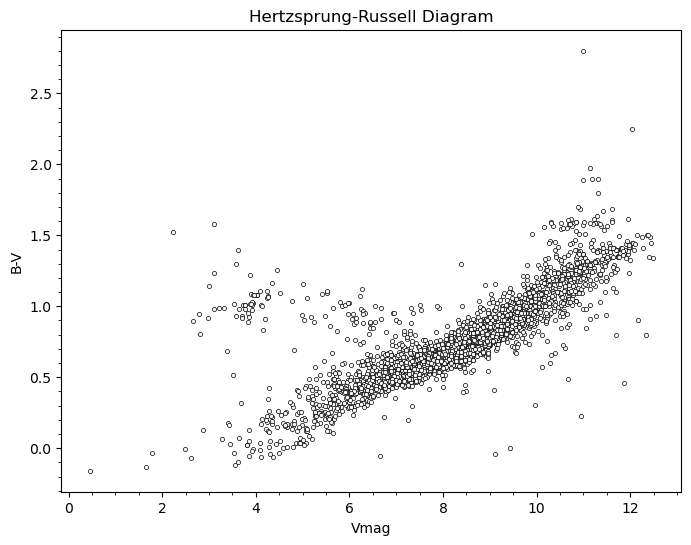

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(Vmag, B_V, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.xlabel('Vmag')
plt.ylabel('B-V')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.show()

In [5]:
pca_sk = decomposition.PCA()
pca_sk = pca_sk.fit(X0)

In [6]:
sk_cs = pca_sk.components_
sk_c0 = pca_sk.mean_
sk_a1 = sk_cs[0,:]
sk_a2 = sk_cs[1,:]

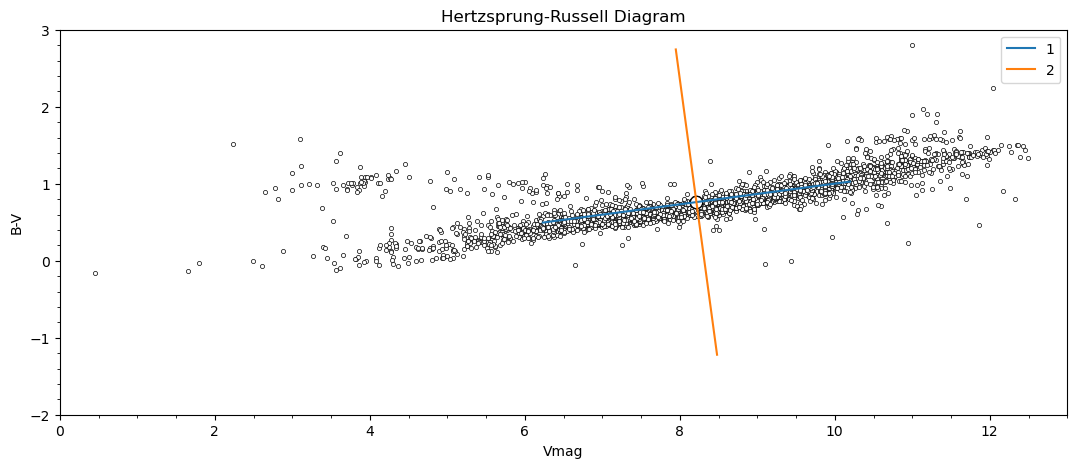

In [7]:
plt.figure(figsize=(13,5))
plt.scatter(Vmag, B_V, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.scatter([sk_c0[0]], [sk_c0[1]], s=81, c='w', edgecolors='k')
plt.plot([sk_c0[0]-2*sk_a1[0], sk_c0[0]+2*sk_a1[0]], [sk_c0[1]-2*sk_a1[1], sk_c0[1]+2*sk_a1[1]], label='1')
plt.plot([sk_c0[0]-2*sk_a2[0], sk_c0[0]+2*sk_a2[0]], [sk_c0[1]-2*sk_a2[1], sk_c0[1]+2*sk_a2[1]], label='2')
plt.xlabel('Vmag')
plt.ylabel('B-V')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.xlim(0,13)
plt.ylim(-2,3)
plt.legend()
plt.show()

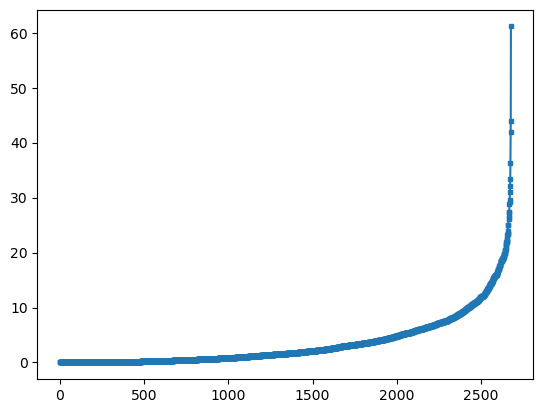

[8.21477969 0.76152987]


In [8]:
c0 = pca.find_center(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=3)
plt.show()
print(c0)

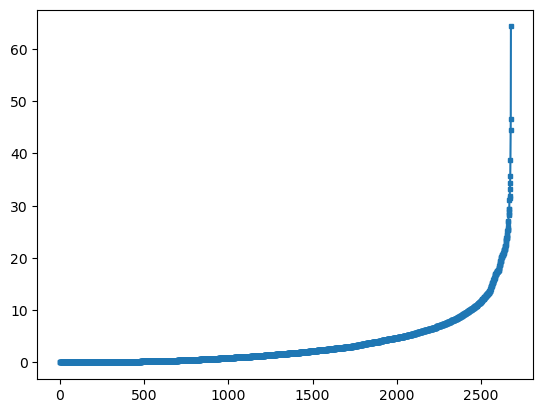

[8.41392964 0.77534383]


In [9]:
# N = len(X0)
# alpha = (N - 8) / N
# print(alpha)
wma = af.averaging_function("WM", func.quantile_func(0.95, func.Sqrt(0.1)))
c = pca.find_rob_center(X0, wma)
plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=3)
plt.show()
print(c)

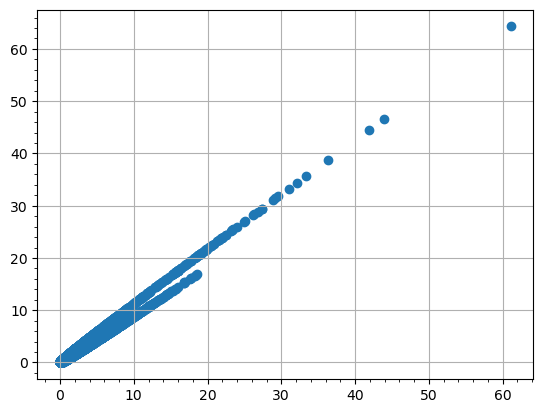

In [10]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [11]:
X1 = X0 - c
X1_0 = X0 - c0

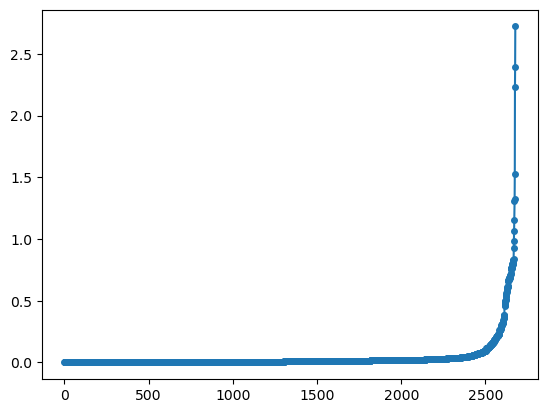

3.5138839265418387 [0.99111001 0.13304489]


In [12]:
a1_0, L1_0 = pca.find_pc(X1_0)
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4)
plt.show()
print(L1_0, a1_0)

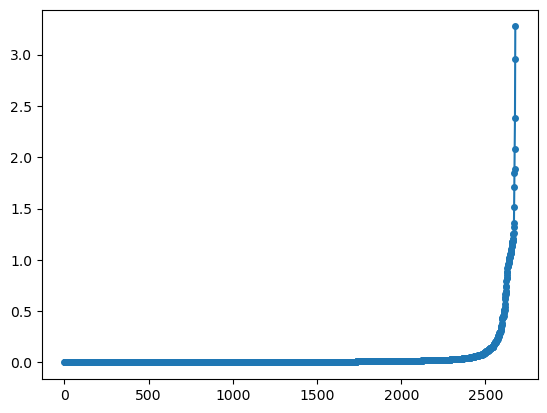

3.3386942339924595 [0.98471612 0.17416708]


In [13]:
# N = len(X0)
# alpha = (N - 12) / N
# print(alpha)
wma = af.averaging_function("WM", func.quantile_func(0.95, func.Sqrt(0.001)))
a1, L1 = pca.find_rob_pc(X1, wma)
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4)
plt.show()
print(L1, a1)
U1 = pca.project_line(X1, a1)
U1_0 = pca.project_line(X1_0, a1_0)

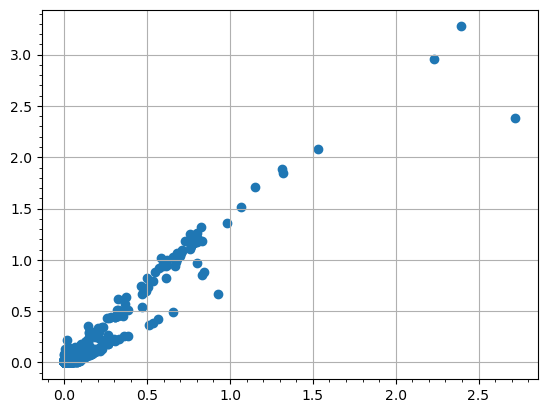

In [14]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [15]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

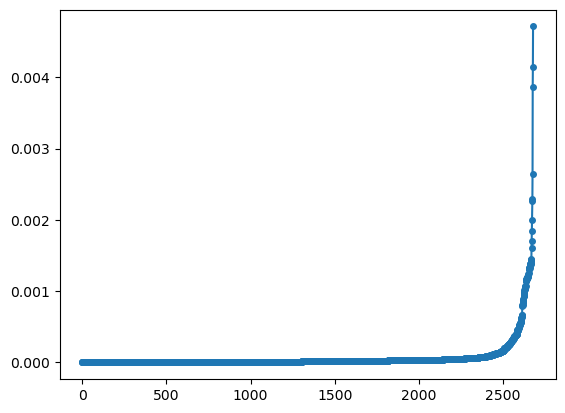

0.0461682313379675 [-0.17416708  0.98471612]


In [16]:
a2_0, L2_0 = pca.find_pc(X2)
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4)
plt.show()
print(L2_0, a2_0)

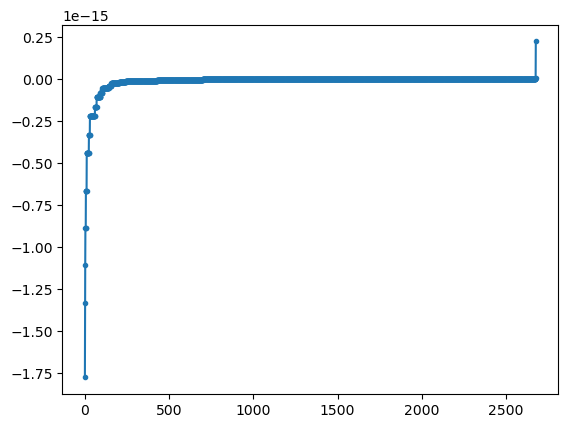

0.017169622169550623 [-0.17416708  0.98471612]


In [17]:
# N = len(X0)
# alpha = (N - 10) / N
# print(alpha)
wma = af.averaging_function("WM", func.quantile_func(0.95, func.Sqrt(0.001)))
a2, L2 = pca.find_rob_pc(X2, wma)
plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=3)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

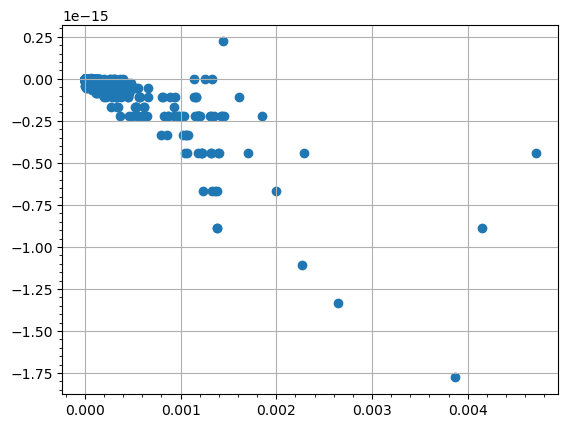

In [18]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


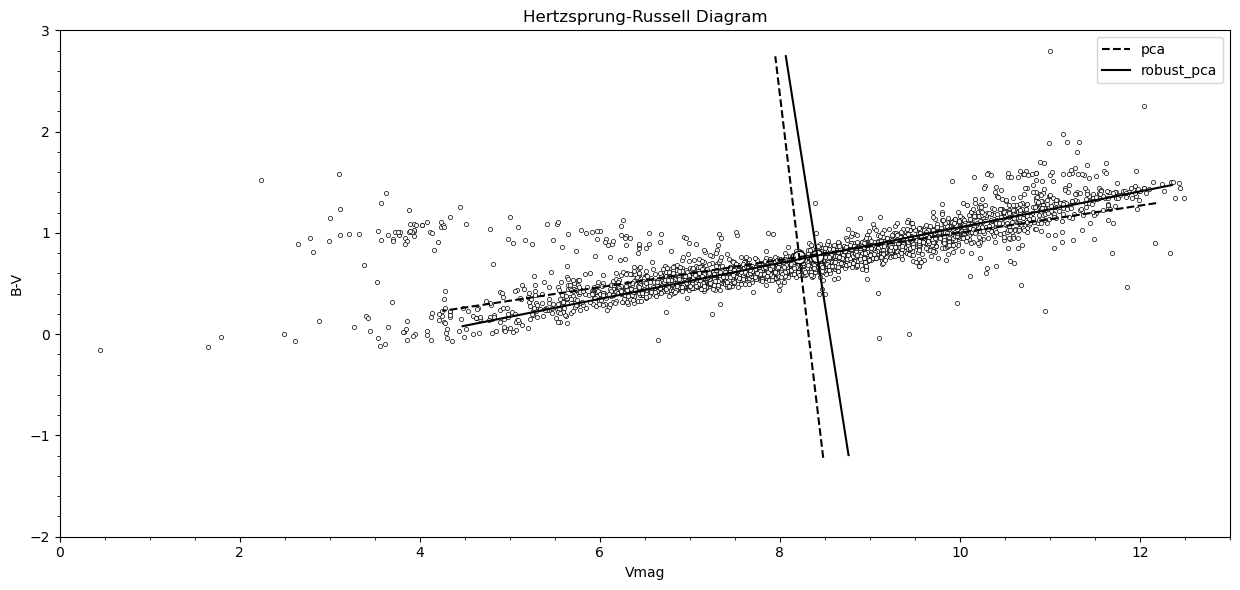

In [19]:
plt.figure(figsize=(12.5,6))
plt.scatter(Vmag, B_V, s=9, c='w', edgecolors='k', linewidth=0.5)
plt.scatter([sk_c0[0]], [sk_c0[1]], s=81, c='w', edgecolors='k')
plt.scatter([c[0]], c[[1]], s=81, c='w', edgecolors='k')
plt.plot([sk_c0[0]-4*sk_a1[0], sk_c0[0]+4*sk_a1[0]], [sk_c0[1]-4*sk_a1[1], sk_c0[1]+4*sk_a1[1]], 
         label='pca', linestyle='--', c='k')
plt.plot([sk_c0[0]-2*sk_a2[0], sk_c0[0]+2*sk_a2[0]], [sk_c0[1]-2*sk_a2[1], sk_c0[1]+2*sk_a2[1]],
        linestyle='--', c='k')
plt.plot([c[0]-4*a1[0], c[0]+4*a1[0]], [c[1]-4*a1[1], c[1]+4*a1[1]], 
         label='robust_pca', linestyle='-', c='k')
plt.plot([c[0]-2*a2[0], c[0]+2*a2[0]], [c[1]-2*a2[1], c[1]+2*a2[1]],
        linestyle='-', c='k')
plt.xlabel('Vmag')
plt.ylabel('B-V')
plt.title('Hertzsprung-Russell Diagram')
plt.minorticks_on()
plt.xlim(0,13)
plt.ylim(-2,3)
plt.legend()
plt.tight_layout()
plt.savefig('fig/robust_pca_HIP_star.eps')
plt.show()

In [20]:
print(c0, c)

[8.21477969 0.76152987] [8.41392964 0.77534383]


In [21]:
print(a1_0, a2_0)
print(a1, a2)

[0.99111001 0.13304489] [-0.17416708  0.98471612]
[0.98471612 0.17416708] [-0.17416708  0.98471612]
